In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-analysis/Walmart.csv


In [2]:
# Import section
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 


In [3]:
df = pd.read_csv('/kaggle/input/walmart-sales-analysis/Walmart.csv')
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


## First checks inside data and accessing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


In [5]:
df_types =[]
cols = list(df.columns)
for i in cols:
    df_types.append({i:type(df[i].loc[0])})
df_types

[{'Order ID': str},
 {'Order Date': str},
 {'Ship Date': str},
 {'Customer Name': str},
 {'Country': str},
 {'City': str},
 {'State': str},
 {'Category': str},
 {'Product Name': str},
 {'Sales': numpy.float64},
 {'Quantity': numpy.float64},
 {'Profit': numpy.float64}]

In [6]:
df_uniques =[]
cols = list(df.columns)
for i in cols:
    df_uniques.append({i:len(df[i].unique())})
df_uniques

[{'Order ID': 1611},
 {'Order Date': 845},
 {'Ship Date': 911},
 {'Customer Name': 686},
 {'Country': 1},
 {'City': 169},
 {'State': 11},
 {'Category': 17},
 {'Product Name': 1494},
 {'Sales': 2295},
 {'Quantity': 14},
 {'Profit': 2164}]

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


The data content look proper. But i will remove the Order ID,country and customer names as non-informative for me.

In [9]:
df_1 = df.copy()
df_1.drop(axis =1,columns=['Order ID','Country','Customer Name'],inplace =True)

In [10]:
##Transform order and ship date into datetime type
df_1['Order Date'] = pd.to_datetime(df['Order Date'], format ='%d-%m-%Y')
df_1['Ship Date'] = pd.to_datetime(df['Ship Date'], format ='%d-%m-%Y')

##I want to add a new column for delivery time 
df_1['Delivery_time'] = df_1['Ship Date'] - df_1['Order Date']
df_1.head()



,Order Date,Ship Date,City,State,Category,Product Name,Sales,Quantity,Profit,Delivery_time
0,2013-06-13,2013-06-17,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,4 days
1,2011-06-09,2011-06-14,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,5 days
2,2011-06-09,2011-06-14,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,5 days
3,2011-06-09,2011-06-14,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,5 days
4,2011-06-09,2011-06-14,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,5 days


In [11]:
vals = df_1['Delivery_time'].max()
print(vals)
df_1['Month'] = df_1['Ship Date'].dt.month
df_1['Year'] = df_1['Ship Date'].dt.year


7 days 00:00:00


##Transform category columns contents into categorical types
state_classes = list(df_1.State.unique())
categ_classes = list(df_1.Category.unique())

s_classes = pd.api.types.CategoricalDtype(ordered = False, categories = state_classes)
categ_classes = pd.api.types.CategoricalDtype(ordered = False, categories = categ_classes)

df_1['State'] = df_1['State'].astype(s_classes)
df_1['Category'] = df_1['Category'].astype(categ_classes)


### Insights
1. Which products sell better in data?
2. Are they more seasonal or not?
3. What are the worst sales?

### Which products sell better in data?

In [12]:
from scipy.stats import shapiro, skew
#### Let's have a glogal view on each variable of interset (Sales, Quantity, Profit)

9.59525420146776


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Sales', ylabel='Density'>

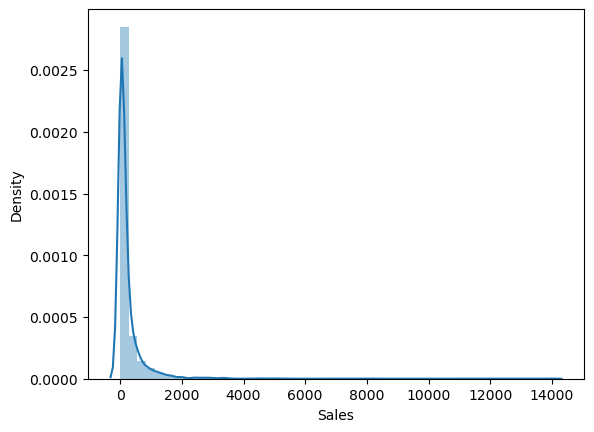

In [13]:
print(skew(df_1.Sales))
sb.distplot(df_1.Sales)

16.759618585290532


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Profit', ylabel='Density'>

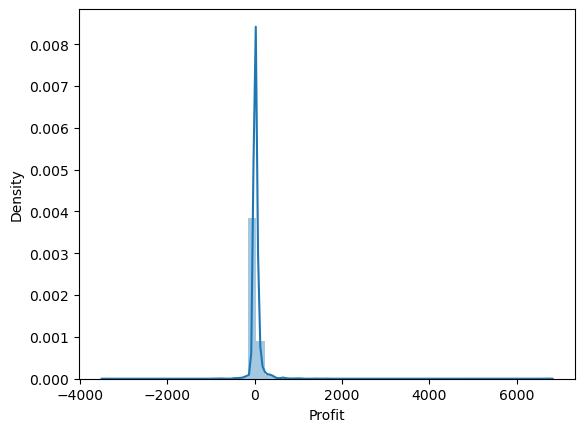

In [14]:
print(skew(df_1.Profit))
sb.distplot(df_1.Profit)

In [15]:
###Let's see if Sales follow a normal distribution

shapiro(df_1.Sales)

ShapiroResult(statistic=0.3989901542663574, pvalue=0.0)

In [16]:
###Let's see if Profits follow a normal distribution
from scipy.stats import shapiro
shapiro(df_1.Profit)

ShapiroResult(statistic=0.243536114692688, pvalue=0.0)

In [17]:
quanti_vars = ['Sales','Quantity','Profit']
quali_vars = ['City','State','Category','Month','Year']

Since the sales and profit are not normally distributed, we are facing non-parametric data.

In [18]:
categ_order = df_1.Category.value_counts().index.to_list()
categ_classes = categ_order
categ_classes = pd.api.types.CategoricalDtype(ordered = True, categories = categ_classes)

df_1['Category'] = df_1['Category'].astype(categ_classes)

In [19]:
#The Sales and Profits are not normally distributed and very skewed at left.
df_1.groupby('Category')[['Sales','Profit']].mean().sort_values(by='Sales',ascending=False)

,Sales,Profit
Category,,
Copiers,1989.969200,773.090000
Machines,1088.311282,-15.870513
Tables,730.643103,12.780517
Chairs,491.697391,19.457101
Bookcases,450.052250,-20.581250
Phones,356.261336,32.891913
Storage,265.161053,32.501842
Supplies,262.711884,9.074058
Accessories,236.876357,63.893876


<AxesSubplot:xlabel='count', ylabel='Category'>

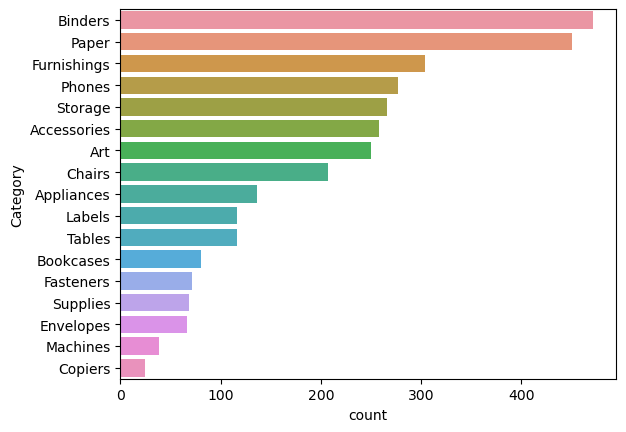

In [20]:
sb.countplot(df_1,y='Category',order = categ_order)

(0.0, 6000.0)

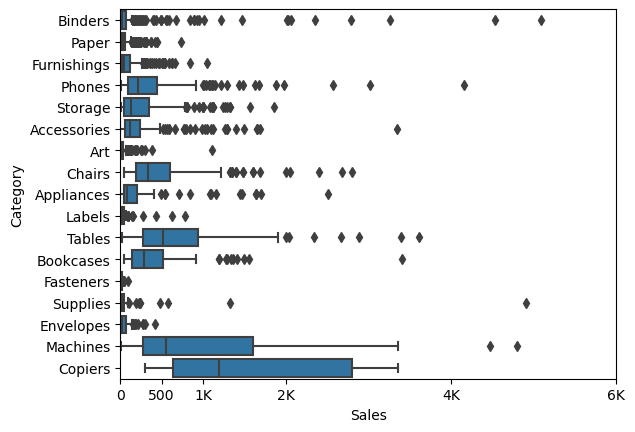

In [21]:
sb.boxplot(df_1,x= quanti_vars[0],y=quali_vars[2],color = sb.color_palette()[0])
ticks = [0, 500,1000, 2000, 4000, 6000]
plt.xticks(ticks, ['0', '500','1K', '2K', '4K', '6K'])
plt.xlim(0,6000)

### By hovering over the entire data, the best sales return to Copiers followed by Machines and tables.

In [22]:
#The Sales and Profits are not normally distributed and very skewed at left.
df_1.groupby('Category')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=False)

,Sales,Profit
Category,,
Copiers,1989.969200,773.090000
Accessories,236.876357,63.893876
Appliances,222.325882,60.744779
Binders,118.813397,34.175754
Phones,356.261336,32.891913
Storage,265.161053,32.501842
Envelopes,61.464179,28.488209
Paper,59.252733,26.931333
Furnishings,98.923454,25.135724


### By hovering over the entire data, the best profits return to Copiers followed by Accessories and appliances. The worst losts are on bookcases. 

## Let's check sells on states

<AxesSubplot:xlabel='count', ylabel='State'>

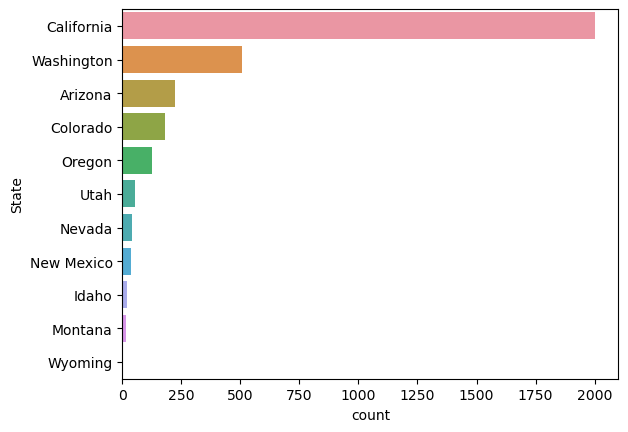

In [23]:
state_order = df_1.State.value_counts().index.to_list()
sb.countplot(df_1,y='State',order = state_order)

In [24]:
#The Sales and Profits are not normally distributed and very skewed at left.
df_1.groupby(['State'])[['Sales','Profit']].mean().sort_values(by='Sales',ascending=False)

,Sales,Profit
State,,
Wyoming,1603.140000,100.200000
Nevada,428.951282,85.045128
Montana,372.623333,122.221333
Washington,273.994644,66.013241
California,228.729475,38.171714
Utah,211.699245,48.048302
Idaho,208.690000,39.368095
Colorado,176.418242,-35.867363
Arizona,157.509018,-15.302991


In [25]:
#The Sales and Profits are not normally distributed and very skewed at left.
df_1.groupby(['State'])[['Sales','Profit']].mean().sort_values(by='Profit',ascending=False)

,Sales,Profit
State,,
Montana,372.623333,122.221333
Wyoming,1603.140000,100.200000
Nevada,428.951282,85.045128
Washington,273.994644,66.013241
Utah,211.699245,48.048302
Idaho,208.690000,39.368095
California,228.729475,38.171714
New Mexico,129.284865,31.273784
Oregon,140.573710,-9.600645


### Even if we have the majority of sells made on Califormia, the best sells and profit are on Wyoming state followed by Nevada and Montana. The worst losts are on Colorado state. 

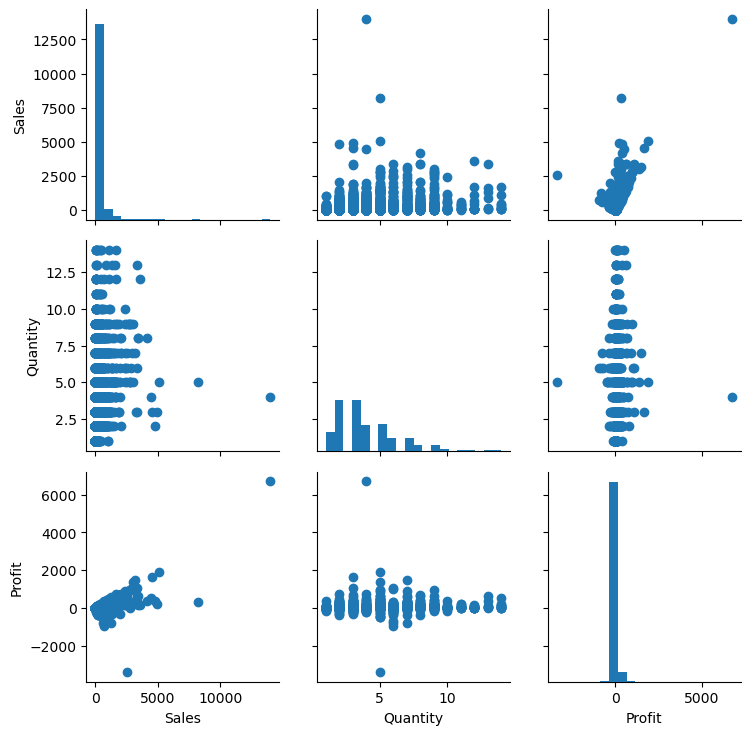

In [26]:
#df_samp = df.sample(500)

g = sb.PairGrid(data = df_1, vars = quanti_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

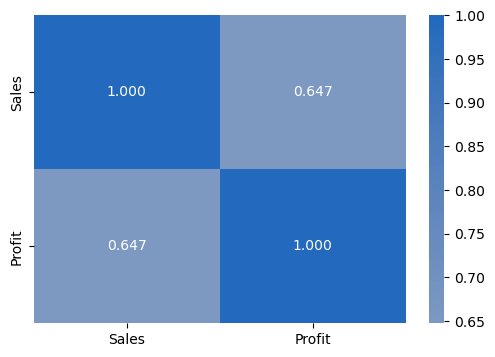

In [27]:
#We can suspect a linearity between the sales and profit inside data.
# correlation plot
plt.figure(figsize = [6, 4])
sb.heatmap(df[['Sales','Profit']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### The Sales are moderately correlated to Profits.

In [28]:
group_1= df_1.groupby(['State','Category'])[['Sales','Profit']]
group_1.mean().sort_values(by='Profit',ascending=False).dropna()

Sales       Profit
State      Category                            
Washington Copiers     4049.966000  1888.486000
Montana    Copiers     2999.950000  1379.980000
California Copiers     1444.677059   464.108824
Utah       Copiers     1499.950000   449.990000
           Appliances  1089.750000   305.130000
...                            ...          ...
Arizona    Tables       443.930000  -253.543333
Colorado   Bookcases    175.946667  -267.655556
Arizona    Bookcases    173.070000  -289.736667
           Machines     321.983333  -310.316667
Colorado   Machines    1104.563333 -1461.420000

[141 rows x 2 columns]

## Are they more seasonal or not?

In [29]:
df_1.groupby(['Year','Month'])[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)

Sales   Profit
Year Month                   
2014 3      30261.11  9369.95
     8      26694.03  6668.73
     9      29513.04  5124.36
2013 12     37748.66  4662.47
2014 7      21080.49  4317.37
2012 3      15844.45  4239.09
2014 12     26687.75  4177.36
2013 9      19372.20  4020.08
     11     19777.64  3740.33
2014 11     30993.85  3676.01
2012 12     25064.42  3458.84
2011 11     22803.27  3431.62
2012 9      17571.88  2971.02
2014 10     19725.16  2938.79
2011 8      16282.04  2921.77
2014 1      13474.93  2887.51
     5      15288.82  2737.33
2013 6      21947.19  2635.43
     7      13019.13  2634.32
2011 9      10222.10  2163.02
     10     11920.62  2133.79
2012 11     16486.93  2050.64
2011 6      11032.47  1984.05
     4      10389.76  1900.90
2014 6      12373.74  1799.16
2012 10     12533.38  1652.69
2011 12     23991.88  1640.53
     7      18469.87  1551.77
2013 8      13590.70  1528.21
2012 6       6785.21  1469.88
2014 2       8010.83  1297.53
2013 10     17348.25  1295.10
2012 4       8801.67  1294.65
2013 1       6689.97  1287.20
2011 3       9769.75  1252.83
2012 5       9915.80  1218.60
2013 3      17465.10  1206.40
     5       7505.95  1152.79
2012 2       3595.31   754.79
2011 5       5383.55   679.74
2012 8       7967.61   484.36
     1       7373.43   393.12
2013 2       3807.35   388.56
2015 1       3974.97   378.25
2013 4      10393.00   325.65
2011 2       1719.63   219.72
2012 7       7963.58    36.10
2011 1       2221.38    11.28
2014 4      14604.08 -1744.90

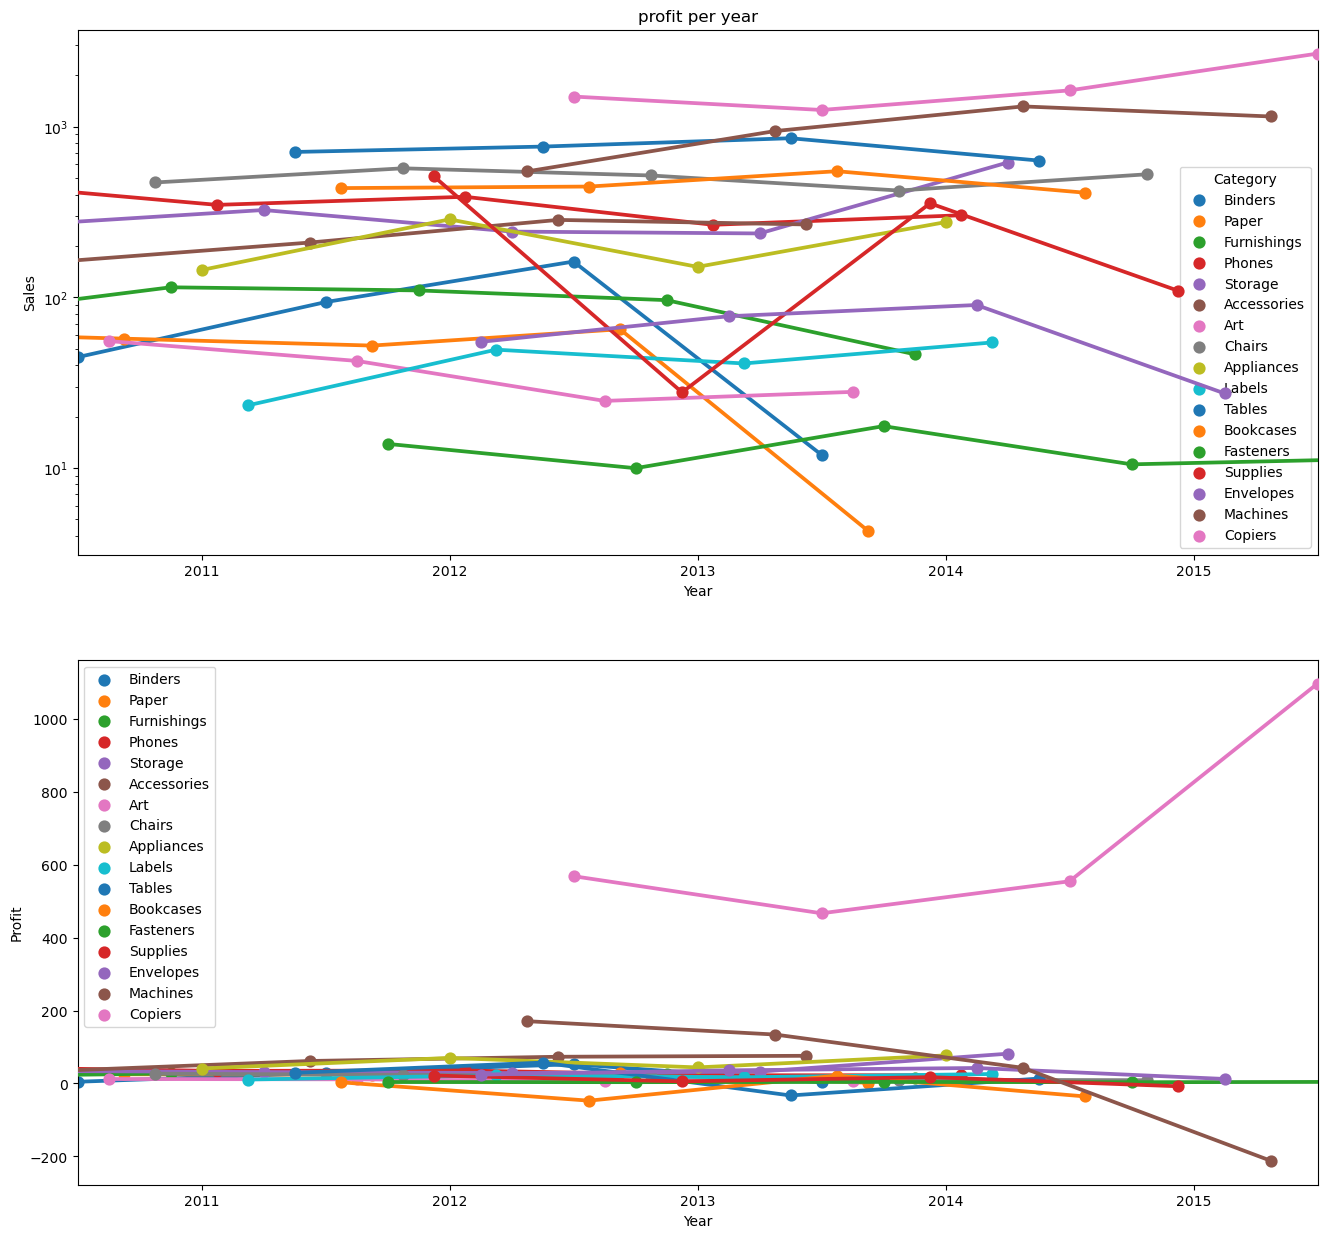

In [30]:
fig,ax =plt.subplots(nrows=2,figsize = [16,15] )
sb.pointplot(data = df_1, x = 'Year', y = 'Sales', hue = 'Category',
           palette = 'tab10',linestyles='-',dodge = 3,errorbar=None, ax=ax[0])
ax[0].set_title('Sales per year')
ax[0].set_ylabel('Sales')
ax[0].set_yscale('log')


sb.pointplot(data = df_1, x = 'Year', y = 'Profit', hue = 'Category',
           palette = 'tab10',linestyles='-',dodge = 3,errorbar=None, ax=ax[1])
ax[0].set_title('profit per year')
ax[0].set_ylabel('Sales')
ax[0].set_yscale('log')

plt.legend(ncol = 1) # re-arrange legend to reduce overlapping

plt.show();

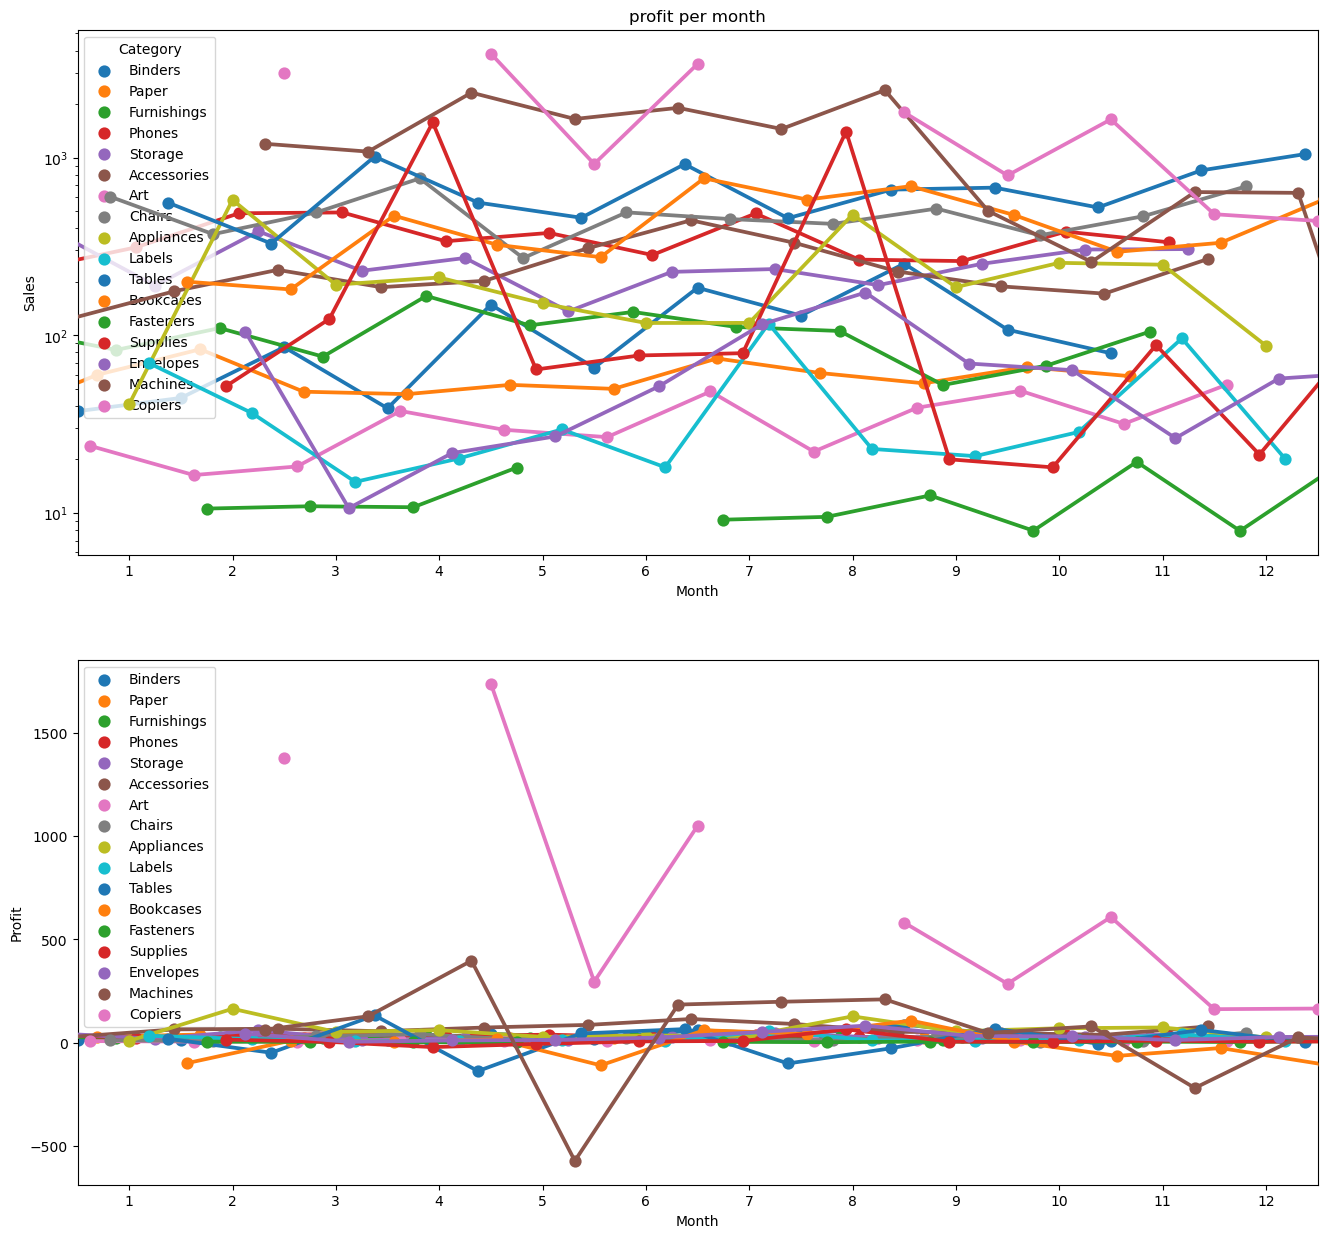

In [31]:
fig,ax =plt.subplots(nrows=2,figsize = [16,15] )
sb.pointplot(data = df_1, x = 'Month', y = 'Sales', hue = 'Category',
           palette = 'tab10',linestyles='-',dodge = 3,errorbar=None, ax=ax[0])
ax[0].set_title('Sales per month')
ax[0].set_ylabel('Sales')
ax[0].set_yscale('log')


sb.pointplot(data = df_1, x = 'Month', y = 'Profit', hue = 'Category',
           palette = 'tab10',linestyles='-',dodge = 3,errorbar=None, ax=ax[1])
ax[0].set_title('profit per month')
ax[0].set_ylabel('Sales')
ax[0].set_yscale('log')

plt.legend(ncol = 1) # re-arrange legend to reduce overlapping

plt.show();

## So to summarize, walmart sales are positively moderately correlated to profits. By hovering over the entire data, the best sales return to Copiers followed by Machines and tables. So as expected, the best profits return to Copiers but followed by Accessories and appliances. The worst losts are on bookcases. Even if we have the majority of sells made on Califormia, the best sells and profit are on Wyoming state followed by Nevada and Montana. The worst losts are on Colorado state. The profits of machines has drastically dropped between 2014 and 2015 contrary to copiers which stilled very prolific.The most constant business is the sell of fasteners over the 5 years.The best sells and profits are made between April and May.

In [32]:
#Thanks for dataset Open to commnents 